In [41]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
# import seaborn as sns
from PIL import Image
from sklearn import decomposition, preprocessing

Function to read the images and convert them to 5D vectors for each pixel:

In [18]:
def readImg(imgPath):
    img = Image.open(imgPath)
    pixels = img.convert('RGB')
    colours = np.array(pixels.getdata()).reshape(img.size + (3,))
    indicesArray = np.moveaxis(np.indices(img.size), 0, 2)
    allArray = np.dstack((indicesArray, colours)).reshape((-1, 5))

    df = pd.DataFrame(allArray, columns = ['y', 'x', 'r', 'g', 'b'])
    df = df[['x', 'y', 'r', 'g', 'b']]  # reorder columns
    return df

In [19]:
images = [os.getcwd() + '/Images/42049_colorBird.jpg', os.getcwd() + '/Images/3096_colorPlane.jpg']  # images are in a dir called Images
bird = readImg(images[0])
plane = readImg(images[1])
print(bird.shape, plane.shape)

(154401, 5) (154401, 5)


Function to normalise the dataframes:

In [20]:
def normalise(df):
    vals = df.values
    scaler = preprocessing.MinMaxScaler()
    scaled = scaler.fit_transform(vals)
    df = pd.DataFrame(scaled, columns = bird.columns)
    return df

In [21]:
bird = normalise(bird)
plane = normalise(plane)

Create a random sample **without** replacement:

In [22]:
def randomSample(df, frac):
    return df.sample(frac = frac, replace = False, random_state = 1)

In [23]:
birdSample = randomSample(bird, 0.5)
planeSample = randomSample(plane, 0.5)
print(birdSample.shape, planeSample.shape)

(77200, 5) (77200, 5)


PCA:

In [36]:
def pcaCalc(df):
    pca = decomposition.PCA(n_components = 5)
    pc = pca.fit_transform(df.values)
    return pc, pca.explained_variance_ratio_

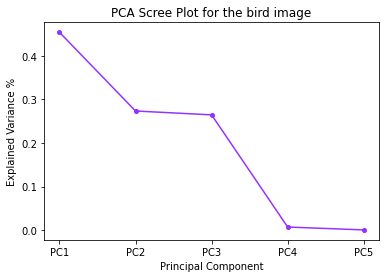

In [39]:
pc, varRatio = pcaCalc(birdSample)
plt.plot(['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], varRatio, marker = 'o', markersize = '4', color = '#9433ff')
plt.title('PCA Scree Plot for the bird image')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance %')
plt.show()
plt.close()

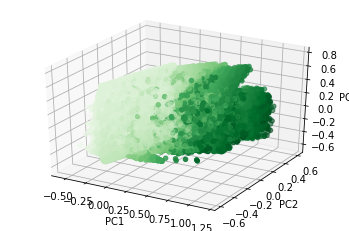

In [50]:
pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
# ax = plt.axes(projection = '3d')
# ax.scatter(pc_df['PC1'], pc_df['PC2'], pc_df['PC3'], c = pc_df['PC1'], cmap = 'Greens')
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')

plt.show()